# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x^*$)=0$ nazywamy *pierwiastkami*.

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

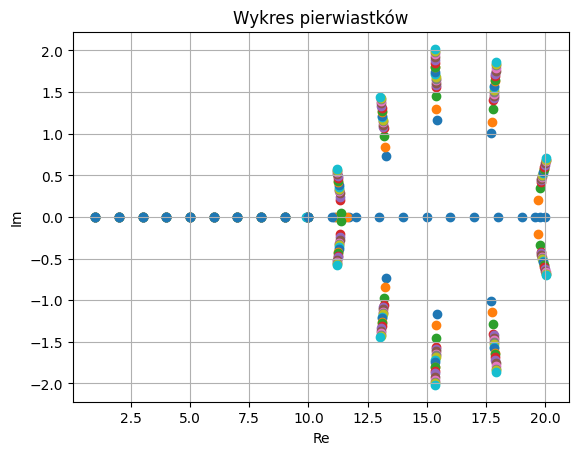

In [2]:
W = np.arange(1, 21, 1)
W_A = main.polly_A(W)
W_iter, roots_iter = main.roots_20(W_A)

for i in range(20):
    W_iter, roots_iter = main.roots_20(W_iter)
    plt.scatter(np.real(roots_iter), np.imag(roots_iter))

plt.scatter(np.real(W), np.imag(W))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Wykres pierwiastków')
plt.grid()
plt.show()

4) Najbardziej wrażliwymi pierwiastek na zaburzenia sa pierwiastki od 10 wzwyż
5) Aby oszacować uwarunkowanie każdego pierwiastka można użyć funkcji boxplot dla części rzeczywistej naszych pierwiastków i odczytać z wykresu ich uwarunkowanie

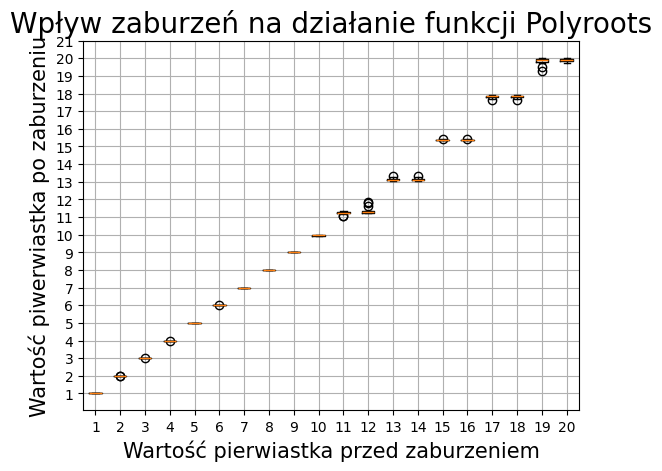

In [3]:
W = np.linspace(1, 20, 20)
poly = main.polly_A(W)

iter_roots = []
for i in range(20):
    coef, samp_roots = main.roots_20(poly)
    iter_roots.append(samp_roots)
    poly = coef
    
iter_roots = np.array(iter_roots)

plt.boxplot(np.real(iter_roots))
plt.yticks(np.arange(1, 22, 1))
plt.grid()
plt.title("Wpływ zaburzeń na działanie funkcji Polyroots", size=20)
plt.ylabel("Wartość piwerwiastka po zaburzeniu", size=15)
plt.xlabel("Wartość pierwiastka przed zaburzeniem", size=15)
plt.show()

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

Wyliczone pierwiastki to:
[0.98453434+0.j         0.98909686-0.01095323j 0.98909686+0.01095323j
 1.00005964-0.01541976j 1.00005964+0.01541976j 1.01090371-0.01083339j
 1.01090371+0.01083339j 1.01534524+0.j        ]


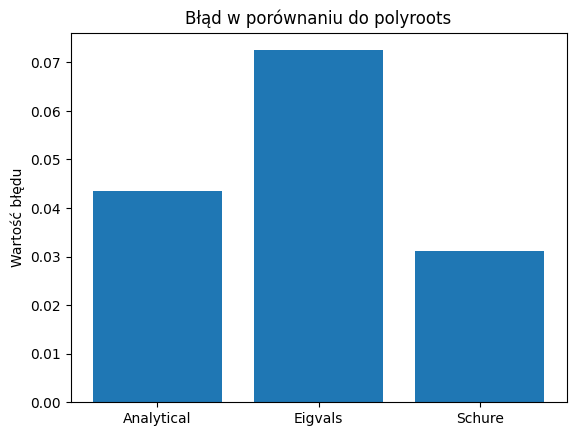

In [4]:
W = np.ones(8)
poly = main.polly_A(W)

frob_matrix, eig, shur, poly_from = main.frob_a(poly[:-1])

x = np.arange(3)
roots = np.sort(P.polyroots(poly))
error_norms = [np.linalg.norm(roots - W), np.linalg.norm(roots - np.sort(eig)), np.linalg.norm(roots - np.sort(np.diag(shur[0])))]

print("Wyliczone pierwiastki to:")
print(roots)

plt.bar(x, error_norms)
plt.xticks(x, ('Analytical', 'Eigvals', 'Schure'))
plt.title('Błąd w porównaniu do polyroots')
plt.ylabel('Wartość błędu')
plt.show()

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


In [5]:
w = np.array([16, -72, -28, 558, -990, 783, -486, 243])
x = np.arange(2)
p = w/243
frob_matrix, eigv, schu, poly = main.frob_a(p[:-1])
schu = scipy.linalg.schur(frob_matrix, output = 'complex')

roots = np.sort(P.polyroots(p))
sort_eigv = np.sort(eigv)
sort_schu = np.sort(np.diag(schu[0]))
n = [np.linalg.norm(roots - sort_eigv), np.linalg.norm(roots - sort_schu)]

print("Wyliczone pierwiastki to:")
print(roots)

Wyliczone pierwiastki to:
[-3.33333333e-01+0.00000000e+00j -6.24500451e-17-1.41421356e+00j
 -6.24500451e-17+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66664040e-01-4.54876230e-06j  6.66664040e-01+4.54876230e-06j
  6.66671919e-01+0.00000000e+00j]


***Zadanie 4.***

Skonstruuj macierz diagonalną $\mathbf{A}_n$ (użyj do tego funkcji [_diag_](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) której współczynniki $x_i = 2^i$ dla $i = \{1,2,...,n\}$ gdzie $n = \{10,20,30\}$.

1. Dla wszystkich macierzy $\mathbf{A}_n$ oblicz ich wartości własne przy użyciu [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals) i porównaj je z analitycznymi wartościami własnymi.
2. Zdefiniuj funcję _main.is_nonsingular_. Przy pomocy tej funkcji skonstruuj losowe macierze wektorów własnych $\mathbf{P}_n$ których wartości współczynników będą liczbami całkowitymi z zakresu (0,100). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze: $$\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}$$ Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
3. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortonormalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ w sposób analogiczny do macierze $\mathbf{B}_n$ używając macierzy $\mathbf{Q}_n$.  Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
4. Bazując na analitycnych wartościach własnych  dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj [macierze Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf). Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
5. Porównaj otrzymane wyniki ze wszystkich punktów i wartości $n$


Dla n = 10:
Wartości własne obliczone:
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
Analityczne wartości własne:
[   2    4    8   16   32   64  128  256  512 1024]
Wartości własne PAP:
[   4.    2.    8.   16.   32.   64.  128.  256.  512. 1024.]
Wartości własne rozkład QR:
[   4.    2.    8.   16.   32.   64.  128.  256.  512. 1024.]
Wartości własne - macierz Frobneiusa:
[-1.02350000e+03+0.j          4.04520703e-01+0.29388375j
  4.04520703e-01-0.29388375j  1.54535800e-01+0.47553712j
  1.54535800e-01-0.47553712j -5.00048857e-01+0.j
 -4.04535800e-01+0.29393022j -4.04535800e-01-0.29393022j
 -1.54496274e-01+0.47556584j -1.54496274e-01-0.47556584j]


c:\Users\Tomek\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Tomek\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


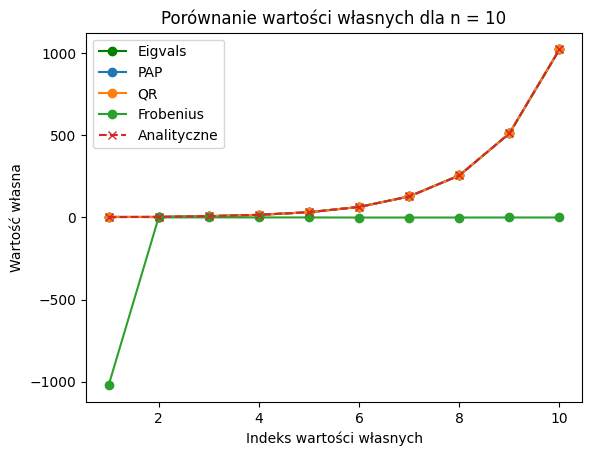


Dla n = 20:
Wartości własne obliczone:
[2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01 3.200000e+01
 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02 1.024000e+03
 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04 3.276800e+04
 6.553600e+04 1.310720e+05 2.621440e+05 5.242880e+05 1.048576e+06]
Analityczne wartości własne:
[      2       4       8      16      32      64     128     256     512
    1024    2048    4096    8192   16384   32768   65536  131072  262144
  524288 1048576]
Wartości własne PAP:
[8.000000e+00 4.000000e+00 2.000000e+00 1.600000e+01 3.200000e+01
 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02 1.024000e+03
 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04 3.276800e+04
 6.553600e+04 1.310720e+05 2.621440e+05 5.242880e+05 1.048576e+06]
Wartości własne rozkład QR:
[4.000000e+00 2.000000e+00 8.000000e+00 1.600000e+01 3.200000e+01
 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02 1.024000e+03
 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04 3.2

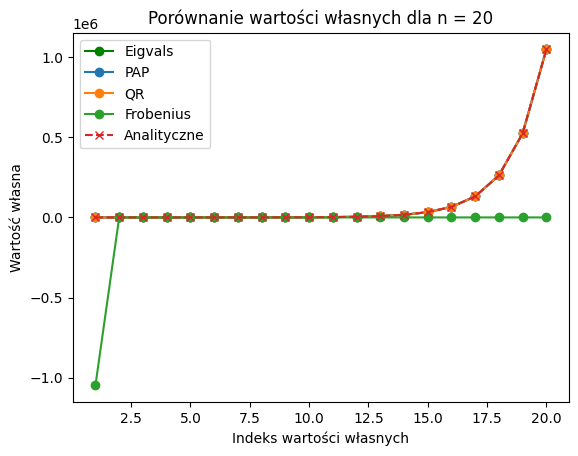


Dla n = 30:
Wartości własne obliczone:
[2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
 3.20000000e+01 6.40000000e+01 1.28000000e+02 2.56000000e+02
 5.12000000e+02 1.02400000e+03 2.04800000e+03 4.09600000e+03
 8.19200000e+03 1.63840000e+04 3.27680000e+04 6.55360000e+04
 1.31072000e+05 2.62144000e+05 5.24288000e+05 1.04857600e+06
 2.09715200e+06 4.19430400e+06 8.38860800e+06 1.67772160e+07
 3.35544320e+07 6.71088640e+07 1.34217728e+08 2.68435456e+08
 5.36870912e+08 1.07374182e+09]
Analityczne wartości własne:
[         2          4          8         16         32         64
        128        256        512       1024       2048       4096
       8192      16384      32768      65536     131072     262144
     524288    1048576    2097152    4194304    8388608   16777216
   33554432   67108864  134217728  268435456  536870912 1073741824]
Wartości własne PAP:
[ 2.00000007e+00       +0.j          3.99999987e+00       +0.j
  7.99999988e+00       +0.j          1.60000001e+01 

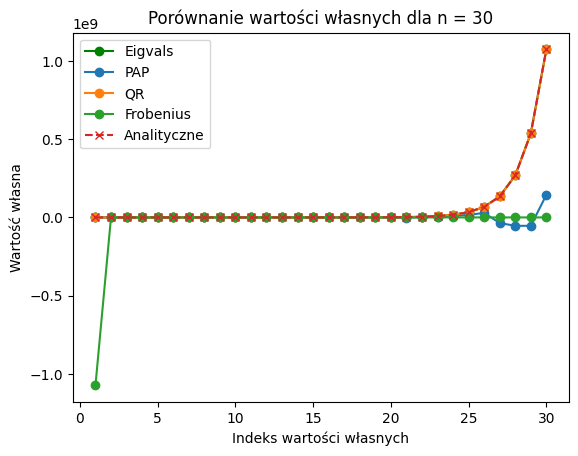

In [48]:
# Zadanie 1
# vec = np.arange(1,31)
# A_10 = np.array(np.diag(np.power(2, vec[:10])))
# A_20 = np.array(np.diag(np.power(2, vec[:20])))
# A_30 = np.array(np.diag(np.power(2, vec[:30])))

# eigvals_10 = np.linalg.eigvals(A_10)
# eigvals_20 = np.linalg.eigvals(A_20)
# eigvals_30 = np.linalg.eigvals(A_30)
# analytical_eigvals_10 = A_10.diagonal()
# analytical_eigvals_20 = A_20.diagonal()
# analytical_eigvals_30 = A_30.diagonal()

n = [10, 20, 30]
B_n = []

for i in n:
    A_i = np.array(np.diag(np.power(2, np.arange(1,i+1))))
    eig_fun = np.linalg.eigvals(A_i)
    eig_analytic = 2**np.arange(1, i+1)
    P_i = np.random.randint(0, 100, size=(i, i))
    if main.is_nonsingular(P_i):
        B_n = np.dot(np.dot(P_i, A_i), np.linalg.inv(P_i))
        eig_b  = (np.linalg.eigvals(B_n))[::-1]
    else:
        print("Macierz P_n jest singularna.")
    Q_n = np.linalg.qr(P_i)[0]
    C_n = np.dot(np.dot(Q_n, A_i), np.linalg.inv(Q_n))
    eig_c = (np.linalg.eigvals(C_n))[::-1]
    frob = main.frob_a(eig_analytic)[0]
    eig_frob = np.linalg.eigvals(frob)
    
    # Porównanie wartości własnych
    print(f"\nDla n = {i}:")
    print("Wartości własne obliczone:")
    print(eig_fun)
    print("Analityczne wartości własne:")
    print(eig_analytic)
    print("Wartości własne PAP:")
    print(eig_b)
    print("Wartości własne rozkład QR:")
    print(eig_c)
    print("Wartości własne - macierz Frobneiusa:")
    print(eig_frob)
    plt.plot(range(1, i+1), eig_fun, marker= 'o', color = 'green',  label='Eigvals')
    plt.plot(range(1, i+1), eig_b, marker='o', label='PAP')
    plt.plot(range(1, i+1), eig_c, marker='o', label='QR')
    plt.plot(range(1, i+1), eig_frob, marker='o', label='Frobenius')
    plt.plot(range(1, i+1), eig_analytic, marker='x', linestyle='dashed', label='Analityczne')
    plt.title(f"Porównanie wartości własnych dla n = {i}")
    plt.xlabel("Indeks wartości własnych")
    plt.ylabel("Wartość własna")
    plt.legend()
    plt.show()